In [5]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = '/content/job_bulletins_complete_nopandas.csv'

with open(file_path, 'r', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    jobs_data = list(reader)

def parse_salary(salary):
    try:
        return float(salary.replace(',', '').strip('$'))
    except:
        return None


In [6]:
# Q1
no_exp_jobs = [
    job for job in jobs_data
    if job['EXPERIENCE_LENGTH'].strip() in ['0', '', '0.0']
]

no_exp_jobs_with_salary = [
    (job['JOB_CLASS_TITLE'], parse_salary(job['ENTRY_SALARY']))
    for job in no_exp_jobs
    if parse_salary(job['ENTRY_SALARY']) is not None
]

sorted_jobs = sorted(no_exp_jobs_with_salary, key=lambda x: x[1], reverse=True)

print("🔹 Top 5 jobs for non-experienced applicants:")
for title, salary in sorted_jobs[:5]:
    print(f"{title} – ${salary:,.0f}")

🔹 Top 5 jobs for non-experienced applicants:
BUILDING MAINTENANCE DISTRICT SUPERVISOR – $121,166
MECHANICAL REPAIR GENERAL SUPERVISOR – $121,166
CHIEF BUILDING OPERATING ENGINEER – $119,997
PORT ELECTRICAL MECHANIC SUPERVISOR – $119,172
WASTEWATER TREATMENT MECHANIC SUPERVISOR – $118,843


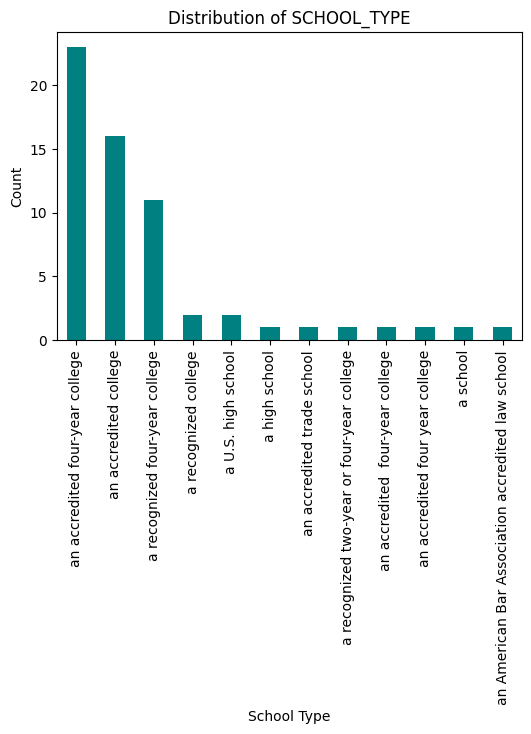

In [7]:
# Q2
school_type_counts = pd.Series(
    [job['SCHOOL_TYPE'] for job in jobs_data if job['SCHOOL_TYPE']]
).value_counts()

plt.figure(figsize=(6, 4))
school_type_counts.plot(kind='bar', color='teal')
plt.title('Distribution of SCHOOL_TYPE')
plt.xlabel('School Type')
plt.ylabel('Count')
plt.show()

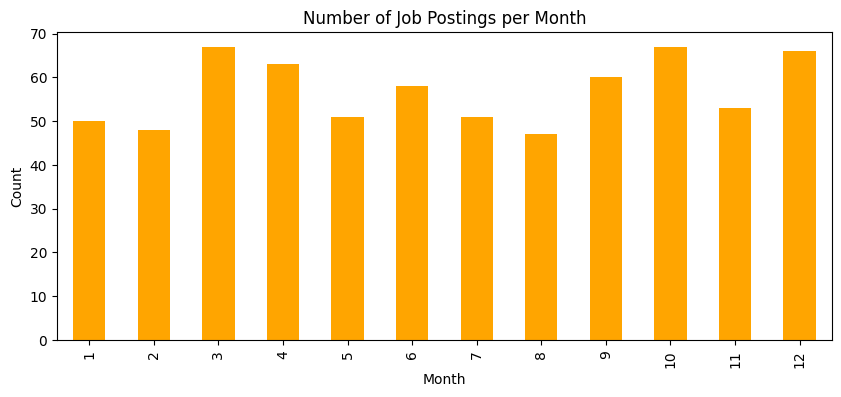

In [19]:
# Q3
post_months = pd.Series([
    pd.to_datetime(job['OPEN_DATE']).month
    for job in jobs_data if job['OPEN_DATE']
])

post_months.value_counts().sort_index().plot(kind='bar', figsize=(10, 4), color='orange')
plt.title("Number of Job Postings per Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

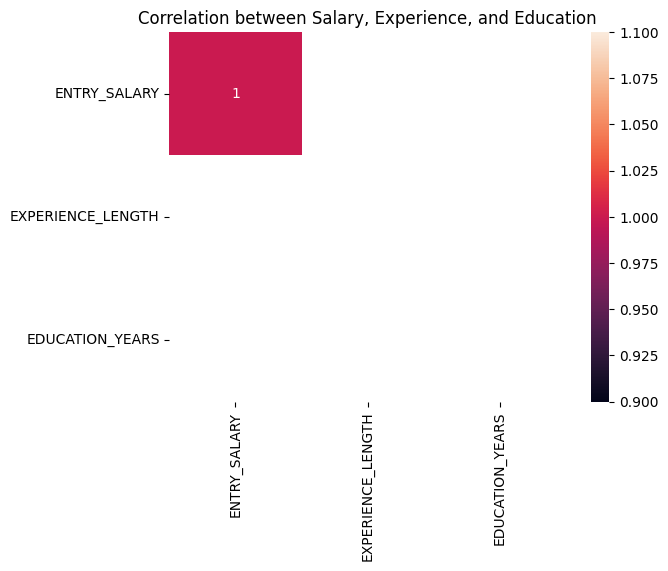

In [10]:
# Q4
df = pd.DataFrame(jobs_data)
df['ENTRY_SALARY'] = df['ENTRY_SALARY'].apply(parse_salary)
df['EXPERIENCE_LENGTH'] = pd.to_numeric(df['EXPERIENCE_LENGTH'], errors='coerce')
df['EDUCATION_YEARS'] = pd.to_numeric(df['EDUCATION_YEARS'], errors='coerce')

sns.heatmap(df[['ENTRY_SALARY', 'EXPERIENCE_LENGTH', 'EDUCATION_YEARS']].corr(), annot=True)
plt.title("Correlation between Salary, Experience, and Education")
plt.show()


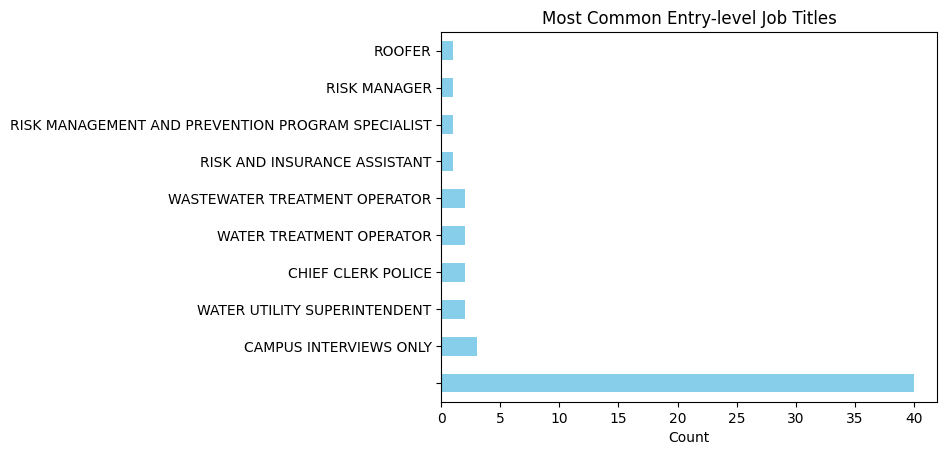

In [11]:
# Q5
fresh_jobs = [job['JOB_CLASS_TITLE'] for job in no_exp_jobs]
pd.Series(fresh_jobs).value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title("Most Common Entry-level Job Titles")
plt.xlabel("Count")
plt.show()


In [12]:
# Q6
bias_keywords = ['male', 'female', 'marital', 'gender', 'orientation', 'disability']

bias_found = any(
    any(keyword in job['JOB_DUTIES'].lower() for keyword in bias_keywords)
    for job in jobs_data if 'JOB_DUTIES' in job and job['JOB_DUTIES']
)

print("Bias keywords found in job descriptions?" , "Yes" if bias_found else "No")


Bias keywords found in job descriptions? Yes


In [14]:
# Q7
no_exp_count = len(no_exp_jobs)
with_exp_count = len([job for job in jobs_data if job['EXPERIENCE_LENGTH'].strip() not in ['0', '', '0.0']])

print("Jobs requiring no experience:", no_exp_count)
print("Jobs requiring experience:", with_exp_count)

if no_exp_count > with_exp_count:
    print(" Recommendation: Build more schools/training for fresh graduates.")
else:
    print("Recommendation: Encourage promotions and skill-building inside jobs.")

Jobs requiring no experience: 683
Jobs requiring experience: 0
 Recommendation: Build more schools/training for fresh graduates.


In [15]:
# Q8
licensed_jobs = [
    parse_salary(job['ENTRY_SALARY'])
    for job in jobs_data if job['DRIVERS_LICENSE_REQ'].lower() == 'yes'
    and parse_salary(job['ENTRY_SALARY']) is not None
]

avg_salary_license = sum(licensed_jobs) / len(licensed_jobs)
print(f" Average salary with driver's license: ${avg_salary_license:,.2f}")

 Average salary with driver's license: $90,835.55


<ipython-input-16-35dea193c87c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['DRIVERS_LICENSE'] = df['DRIVERS_LICENSE_REQ'].apply(lambda x: 1 if x.lower() == 'yes' else 0)


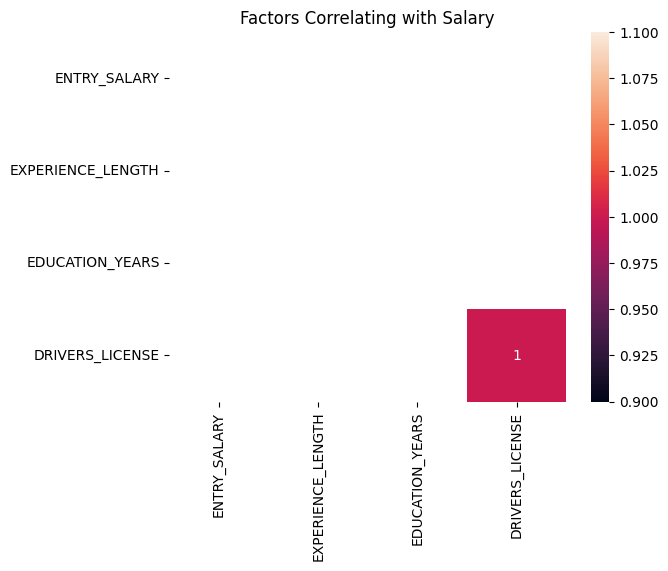

In [16]:
# Q9
df_filtered = df.dropna(subset=['ENTRY_SALARY', 'EXPERIENCE_LENGTH', 'EDUCATION_YEARS'])
df_filtered['DRIVERS_LICENSE'] = df['DRIVERS_LICENSE_REQ'].apply(lambda x: 1 if x.lower() == 'yes' else 0)

sns.heatmap(df_filtered[['ENTRY_SALARY', 'EXPERIENCE_LENGTH', 'EDUCATION_YEARS', 'DRIVERS_LICENSE']].corr(), annot=True)
plt.title("Factors Correlating with Salary")
plt.show()

        ENTRY_SALARY  EXPERIENCE_LENGTH  EDUCATION_YEARS
count      83.000000                0.0              1.0
mean    90857.590361                NaN              1.0
std     15854.501797                NaN              NaN
min     49882.000000                NaN              1.0
25%     81851.500000                NaN              1.0
50%     90995.000000                NaN              1.0
75%    100106.500000                NaN              1.0
max    121166.000000                NaN              1.0


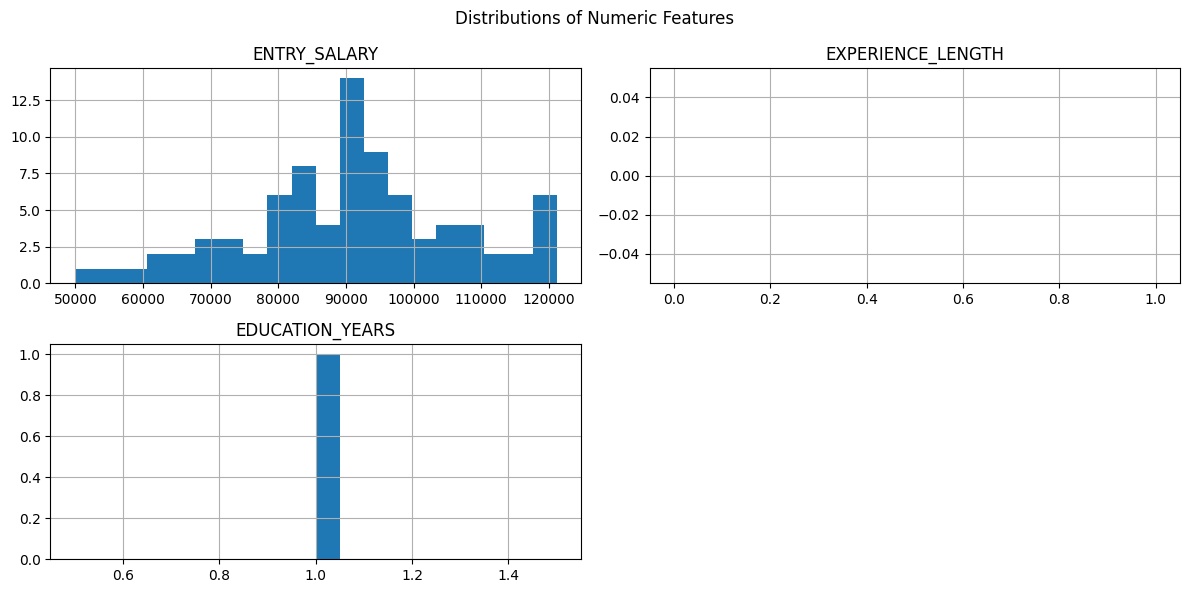

In [17]:
# Q10
print(df[['ENTRY_SALARY', 'EXPERIENCE_LENGTH', 'EDUCATION_YEARS']].describe())

df[['ENTRY_SALARY', 'EXPERIENCE_LENGTH', 'EDUCATION_YEARS']].hist(bins=20, figsize=(12, 6))
plt.suptitle("Distributions of Numeric Features")
plt.tight_layout()
plt.show()


=== JOB_CLASS_TITLE ===
JOB_CLASS_TITLE
NaN                                                  40
CAMPUS INTERVIEWS ONLY                                3
WATER UTILITY SUPERINTENDENT                          2
CHIEF CLERK POLICE                                    2
WATER TREATMENT OPERATOR                              2
WASTEWATER TREATMENT OPERATOR                         2
RISK AND INSURANCE ASSISTANT                          1
RISK MANAGEMENT AND PREVENTION PROGRAM SPECIALIST     1
RISK MANAGER                                          1
ROOFER                                                1
Name: count, dtype: int64


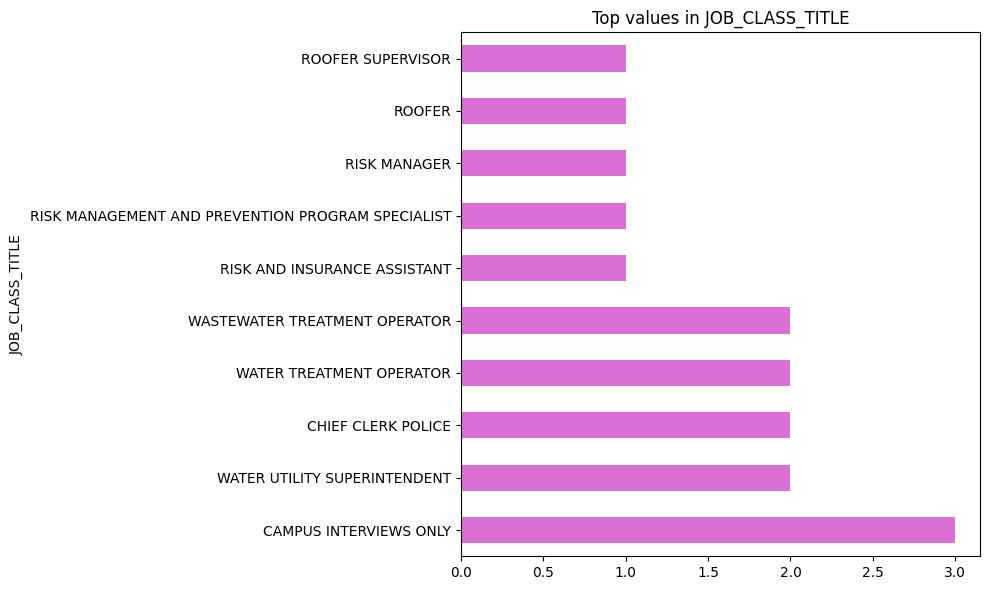


=== SCHOOL_TYPE ===
SCHOOL_TYPE
NaN                                           622
an accredited four-year college                23
an accredited college                          16
a recognized four-year college                 11
a recognized college                            2
a U.S. high school                              2
a high school                                   1
an accredited trade school                      1
a recognized two-year or four-year college      1
an accredited  four-year college                1
Name: count, dtype: int64


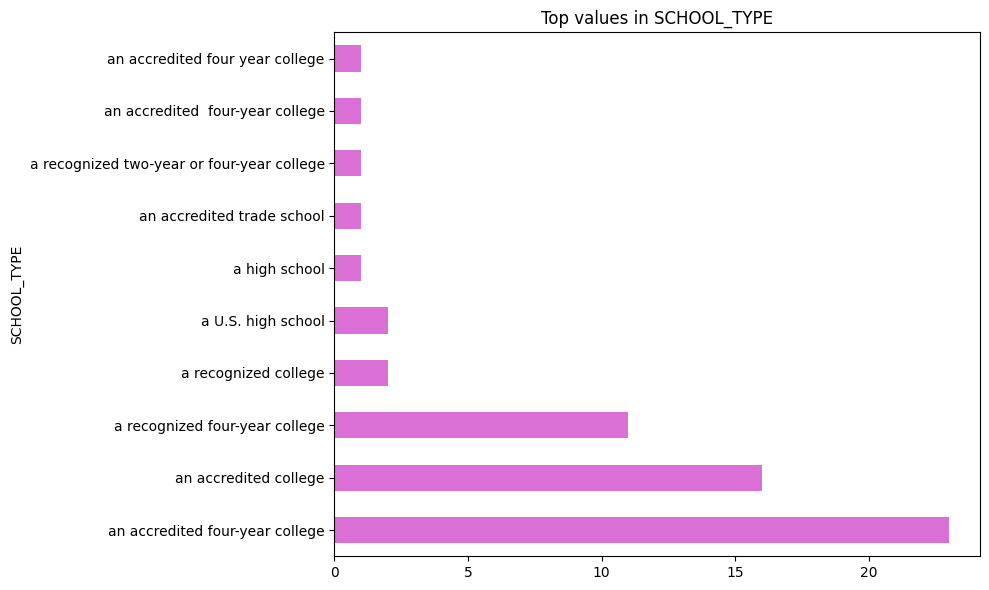


=== DRIVERS_LICENSE_REQ ===
DRIVERS_LICENSE_REQ
YES    624
NaN     59
Name: count, dtype: int64


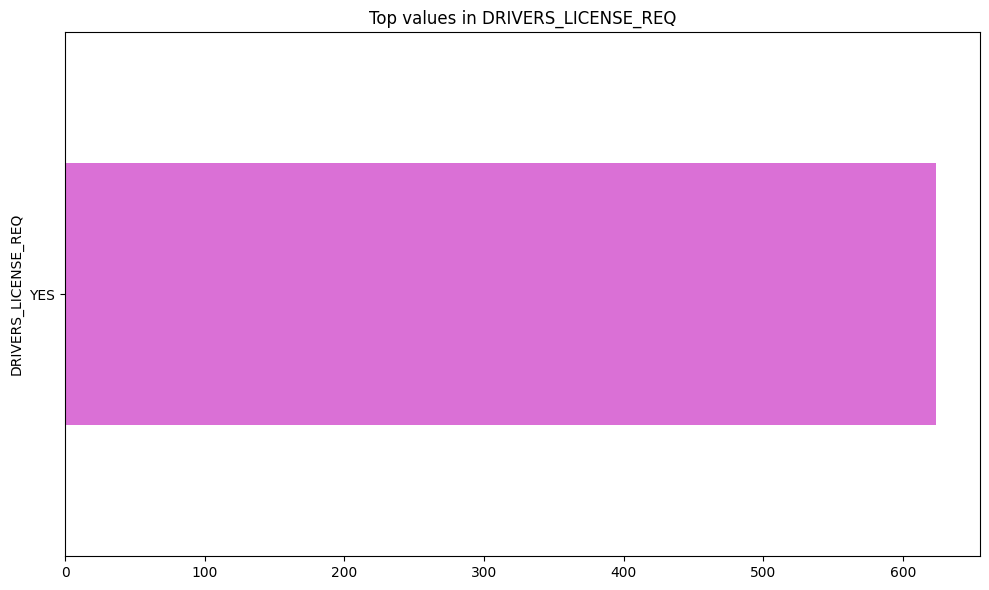


=== FULL_TIME_PART_TIME ===
FULL_TIME_PART_TIME
FULL_TIME    476
PART_TIME    207
Name: count, dtype: int64


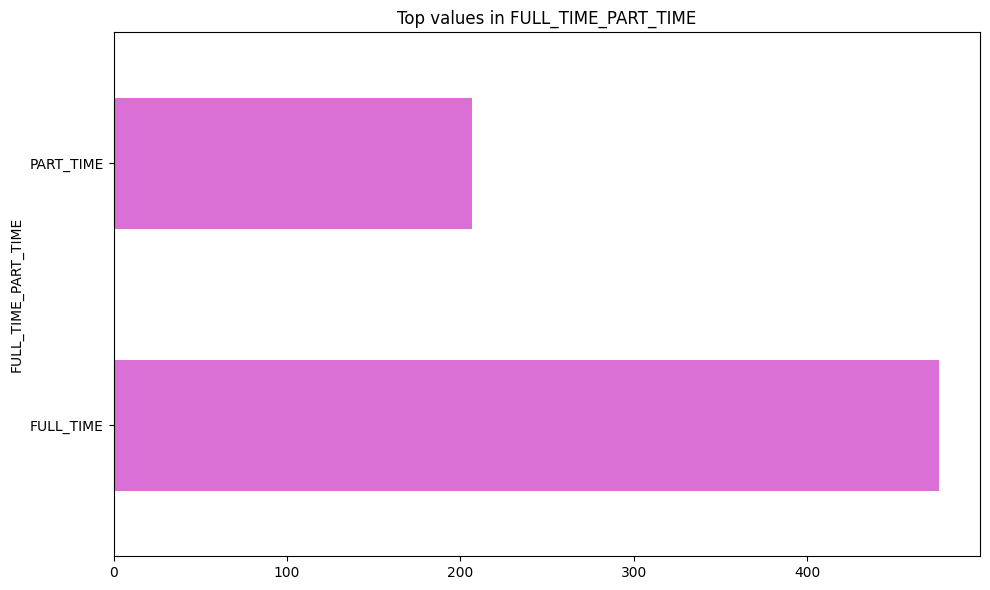


=== EXAM_TYPE ===
EXAM_TYPE
INTERVIEW                 362
WRITTEN_TEST,INTERVIEW    153
WRITTEN_TEST              105
NaN                        63
Name: count, dtype: int64


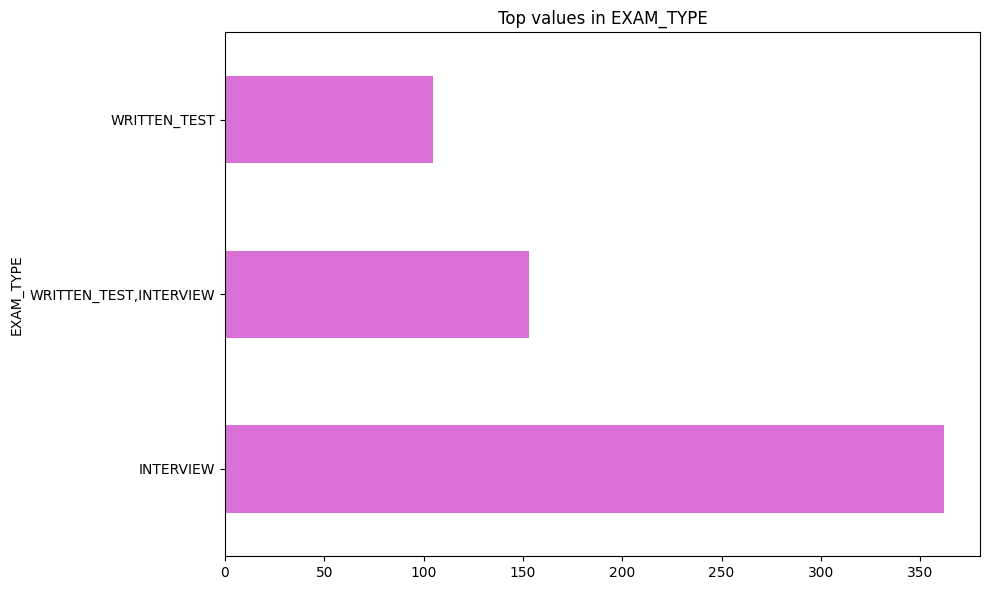

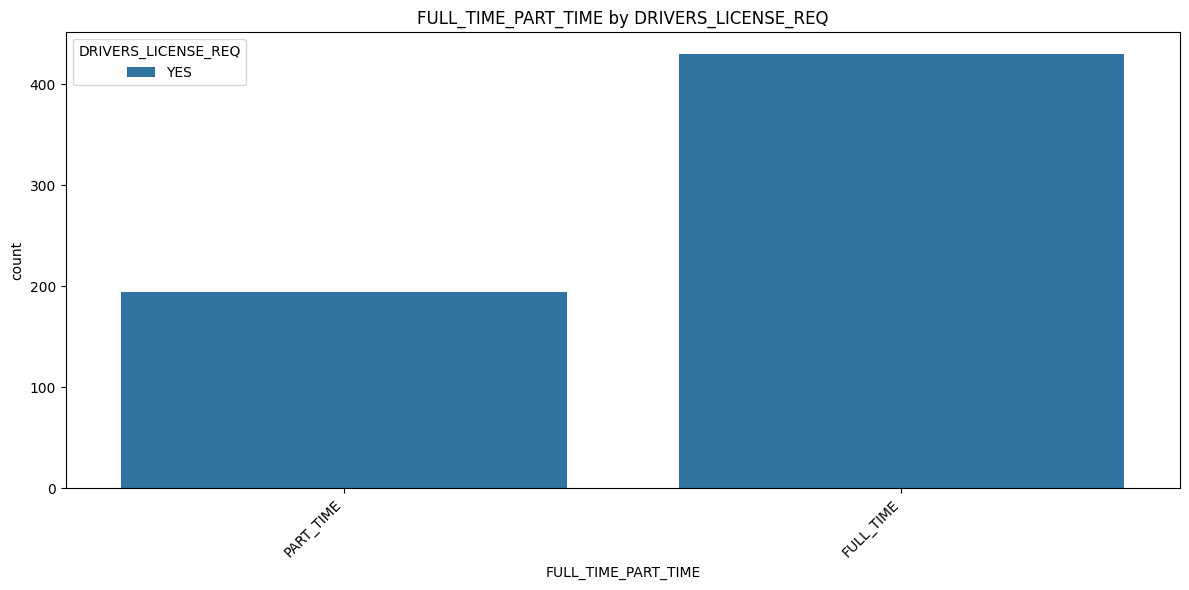

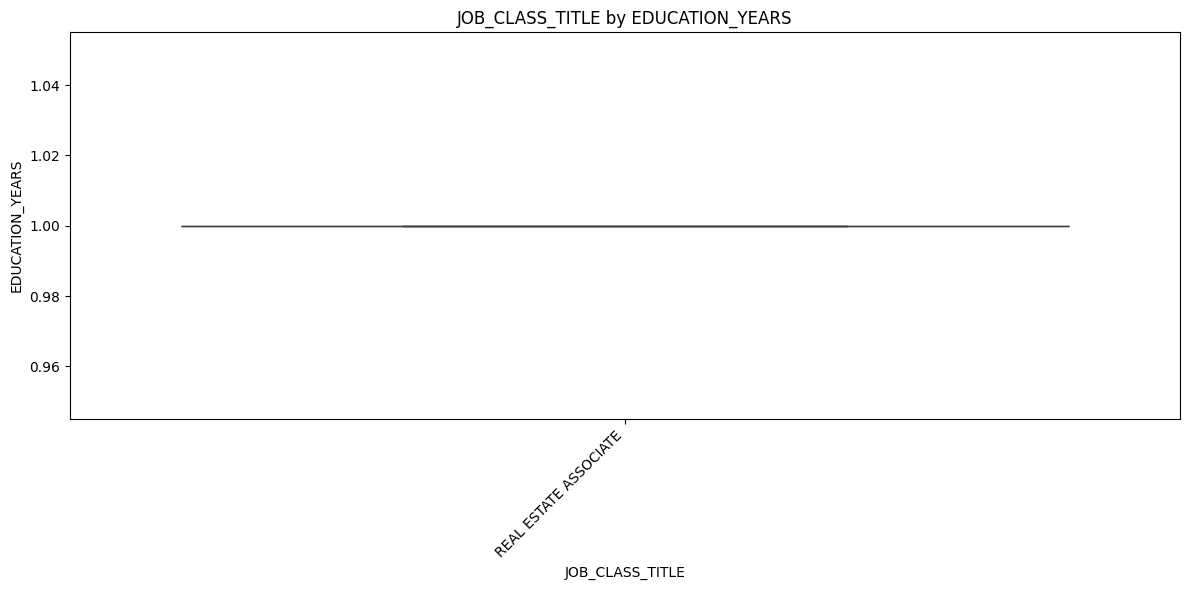

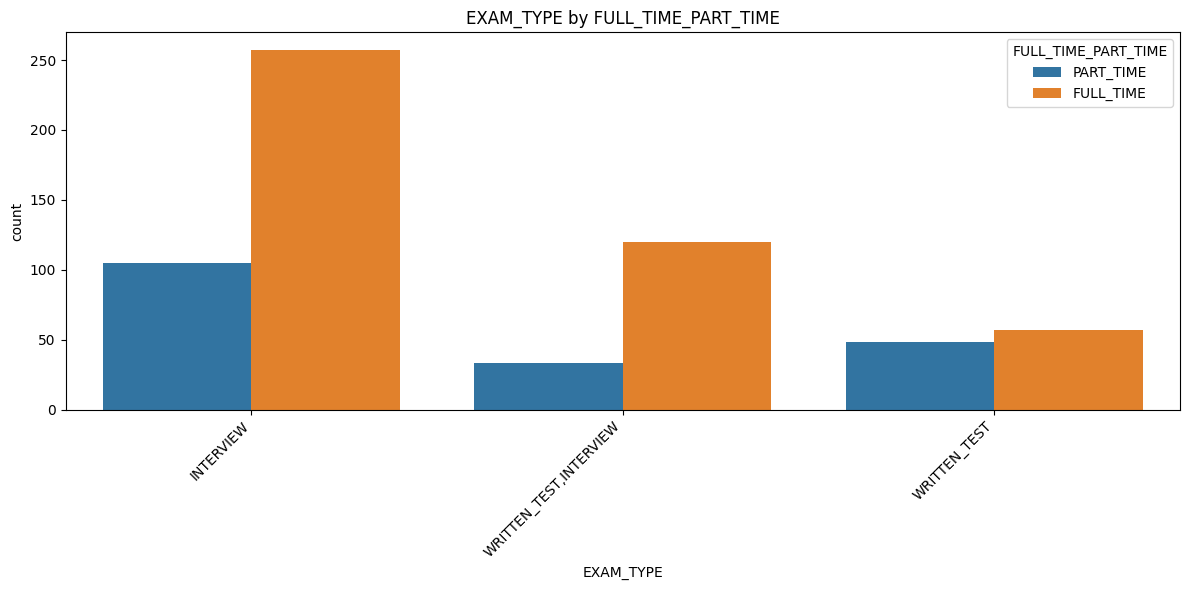

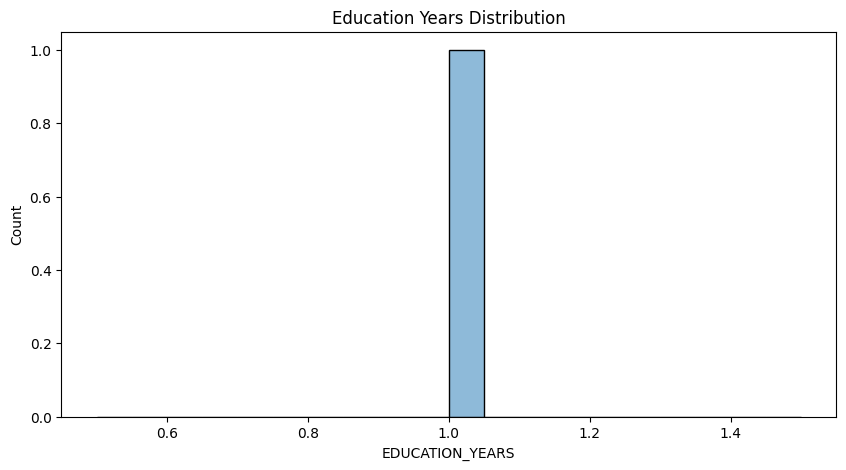

In [23]:
# Q11
def analyze_column(col, data):
    print(f"\n=== {col} ===")
    print(data[col].value_counts(dropna=False).head(10))
    plt.figure(figsize=(10, 6))
    data[col].value_counts().head(10).plot(kind='barh', color='orchid')
    plt.title(f"Top values in {col}")
    plt.tight_layout()
    plt.show()

def plot_relationship(x, y, data, plot_type='box'):
    plt.figure(figsize=(12, 6))
    if plot_type == 'box':
        sns.boxplot(data=data, x=x, y=y)
    else:
        sns.countplot(data=data, x=x, hue=y)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'{x} by {y}')
    plt.tight_layout()
    plt.show()

# Main analysis
cols = ['JOB_CLASS_TITLE', 'SCHOOL_TYPE', 'DRIVERS_LICENSE_REQ', 'FULL_TIME_PART_TIME', 'EXAM_TYPE']
[analyze_column(col, df) for col in cols]

# Bivariate analysis
plot_relationship('FULL_TIME_PART_TIME', 'DRIVERS_LICENSE_REQ', df, 'count')
plot_relationship('JOB_CLASS_TITLE', 'EDUCATION_YEARS', df[df['EDUCATION_YEARS'].notna()].nlargest(100, 'EDUCATION_YEARS'))
plot_relationship('EXAM_TYPE', 'FULL_TIME_PART_TIME', df, 'count')

# Education distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['EDUCATION_YEARS'].dropna(), bins=20, kde=True)
plt.title('Education Years Distribution')
plt.show()